In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
dataset = load_boston()

print(dataset.DESCR)

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
print(df.head())

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# Data Cleansing

df.info()
print(df.isnull().sum())

In [15]:
# Feature Selection

# df = pd.DataFrame([[1,0],[0,1]])
# print(df.corr())

# df = pd.DataFrame([[1,3],[2,6]])
# print(df.corr())

corr = df.corr()
print(corr)
print("\n")
print(corr['MEDV'])

#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)

#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [ ]:
# Multiple Regression

# scatter plot showing the relationship between the LSTAT feature and the MEDV label
plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [ ]:
# scatter plot showing the relationship between the RM feature and the MEDV label
plt.scatter(df['RM'], df['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [ ]:
# plotting the two features and the label on a 3D chart

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(18,15))
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'], df['RM'], df['MEDV'], c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

In [16]:
# Training the Model

# The x DataFrame will contain the combination of the LSTAT and RM features
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])

# while the Y DataFrame will contain the MEDV label
Y = df['MEDV']

# We will split the dataset into 70 percent for training and 30 percent for testing
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, 
                                                    test_size = 0.3, 
                                                    random_state=5)

print(x.head())
print(x_train.head())

print('\n')
print(x_train.shape)
print(Y_train.shape)

print('\n')
print(x_test.shape)
print(Y_test.shape)

# using the LinearRegression class to perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)

# Once the model is trained, we will use the testing set to perform some predictions
price_pred = model.predict(x_test)

print('\n R-Squared: %.4f' % model.score(x_test,Y_test))

   LSTAT     RM
0   4.98  6.575
1   9.14  6.421
2   4.03  7.185
3   2.94  6.998
4   5.33  7.147
     LSTAT     RM
445  23.98  6.459
428  21.52  6.193
481   7.74  6.750
55    4.81  7.249
488  18.06  5.454


(354, 2)
(354,)


(152, 2)
(152,)

 R-Squared: 0.6162


36.494221109153244


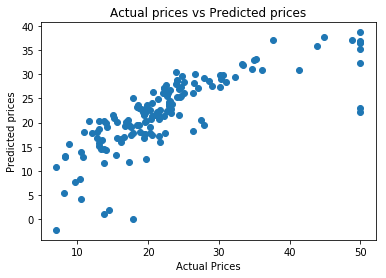

In [4]:
# We will also plot a scatter plot showing the actual price vs. the predicted price:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, price_pred)
print(mse)
plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [17]:
# Getting the Intercept and Coefficients

print(model.intercept_)
print(model.coef_)
print(model.predict([[30,5]]))

0.38437936780346504
[-0.65957972  4.83197581]
[4.75686695]


<IPython.core.display.Javascript object>


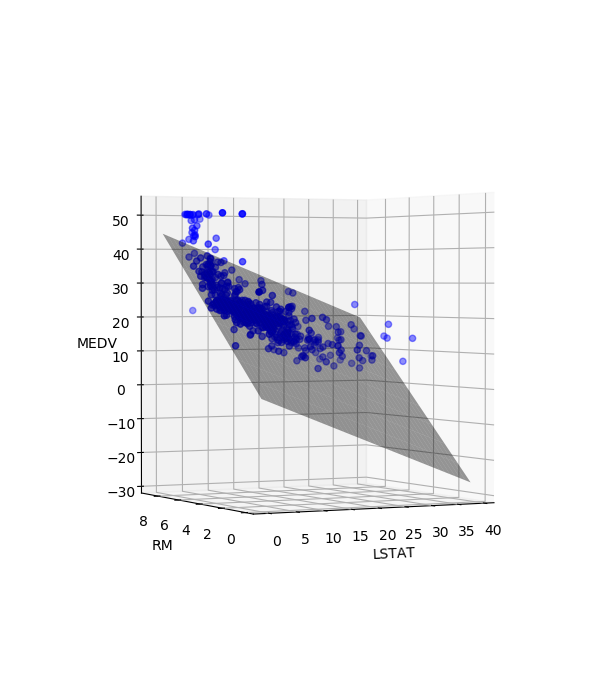

-1.358272811874496
[-0.64235833  5.09478798]


In [21]:
# Plotting the 3D Hyperplane
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'], x['RM'], Y, c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)
#---for LSTAT---
y_surf = np.arange(0, 10, 1)
#---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
plt.show()
print(model.intercept_)
print(model.coef_)